# Integration and optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

## Integration

In [3]:
def trapz(x, y, axis=0):
    return 0.5 * np.sum((y[1:]+y[:-1])*(x[1:]-x[:-1]), axis=axis)

In [4]:
X=np.linspace(0,1,1000)

In [5]:
Y=X**2

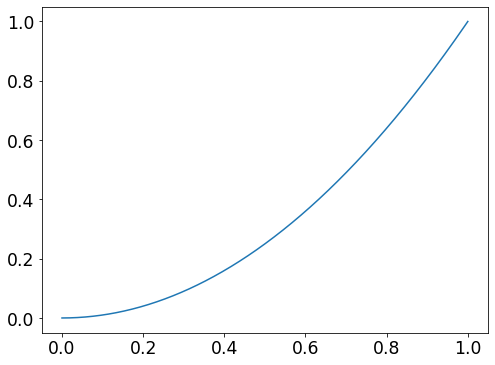

In [6]:
plt.plot(X,Y)

In [7]:
trapz(X, Y, axis=0)

0.333333500333834

In [8]:
1/3.

0.3333333333333333

## Optimization

In [9]:
from scipy.optimize import minimize, rosen, rosen_der

In [23]:
options={'disp': False} 

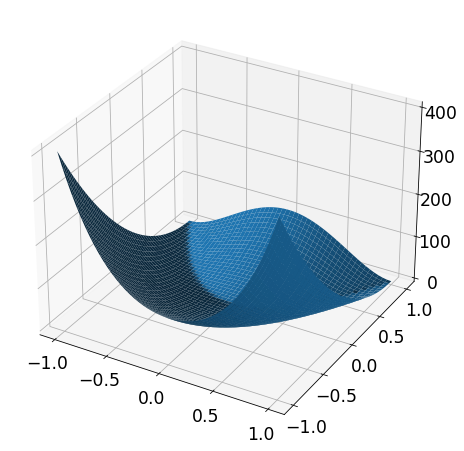

In [10]:
plt.figure(figsize=(10,8))
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen([X, Y]))
plt.show()

In [11]:
options={'disp': False} 
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

## The use of optimize

Use scipy.optimize to minimize a function of 12 arguments.
I started the optimization a while ago and still waiting for results.

Is there a way to force scipy.optimize to display its progress (like how much is already done, what are the current best point)?

https://izziswift.com/how-to-display-progress-of-scipy-optimize-function/

### Solution 1:

As mg007 suggested, some of the scipy.optimize routines allow for a callback function (unfortunately leastsq does not permit this at the moment). Below is an example using the “fmin_bfgs” routine where I use a callback function to display the current value of the arguments and the value of the objective function at each iteration.

In [12]:
options={'disp': False} 

In [13]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31


In [14]:
res.x

array([1., 1., 1., 1., 1.])

In [15]:
options={'disp': True} 

https://izziswift.com/how-to-display-progress-of-scipy-optimize-function/

In [16]:
import numpy as np
from scipy.optimize import fmin_bfgs
Nfeval = 1
def rosen(X): #Rosenbrock function
    return (1.0 - X[0])**2 + 100.0 * (X[1] - X[0]**2)**2 + \
           (1.0 - X[1])**2 + 100.0 * (X[2] - X[1]**2)**2
def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}   {4: 3.6f}'.format(Nfeval, Xi[0], Xi[1], Xi[2], rosen(Xi)))
    Nfeval += 1
print ('{0:4s}   {1:9s}   {2:9s}   {3:9s}   {4:9s}'.format('Iter', ' X1', ' X2', ' X3', 'f(X)'))   
x0 = np.array([1.1, 1.1, 1.1], dtype=np.double)
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    fmin_bfgs(rosen, 
              x0, 
              callback=callbackF, 
              maxiter=2000, 
              full_output=True, 
              retall=False)

Iter    X1          X2          X3         f(X)     
   1    1.022987    1.057849    1.134862    0.041767
   2    1.022371    1.058610    1.134477    0.040907
   3    1.012026    1.031387    1.070837    0.011310
   4    0.997529    0.996771    0.993285    0.000315
   5    0.997469    0.995079    0.990240    0.000033
   6    0.998048    0.996186    0.992605    0.000024
   7    0.998769    0.997551    0.995328    0.000012
   8    0.999992    0.999948    0.999974    0.000001
   9    1.000043    1.000076    1.000170    0.000000
  10    1.000001    1.000003    1.000006    0.000000
  11    1.000000    1.000001    1.000001    0.000000
  12    1.000000    0.999999    0.999998    0.000000
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 272
         Gradient evaluations: 65


### Solution 2:

Following @joel’s example, there is a neat and efficient way to do the similar thing. Following example show how can we get rid of global variables, call_back functions and re-evaluating target function multiple times.

In [17]:
import numpy as np
from scipy.optimize import fmin_bfgs
def rosen(X, info): #Rosenbrock function
    res = (1.0 - X[0])**2 + 100.0 * (X[1] - X[0]**2)**2 + \
           (1.0 - X[1])**2 + 100.0 * (X[2] - X[1]**2)**2
    # display information
    if info['Nfeval']%100 == 0:
        print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}   {4: 3.6f}'.format(info['Nfeval'], X[0], X[1], X[2], res))
    info['Nfeval'] += 1
    return res
print('{0:4s}   {1:9s}   {2:9s}   {3:9s}   {4:9s}'.format('Iter', ' X1', ' X2', ' X3', 'f(X)'))  
x0 = np.array([1.1, 1.1, 1.1], dtype=np.double)
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    fmin_bfgs(rosen, 
              x0, 
              args=({'Nfeval':0},), 
              maxiter=1000, 
              full_output=True, 
              retall=False,
              )

Iter    X1          X2          X3         f(X)     
   0    1.100000    1.100000    1.100000    2.440000
 100    1.000000    0.999999    0.999998    0.000000
 200    1.000000    0.999999    0.999998    0.000000
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 272
         Gradient evaluations: 65


However, no free launch, here I used function evaluation times instead of algorithmic iteration times as a counter. Some algorithms may evaluate target function multiple times in a single iteration.

### Sulution 5

Many of the optimizers in scipy indeed lack verbose output (the ‘trust-constr’ method of scipy.optimize.minimize being an exception). I faced a similar issue and solved it by creating a wrapper around the objective function and using the callback function. No additional function evaluations are performed here, so this should be an efficient solution.


In [18]:
import numpy as np
class Simulator:
    def __init__(self, function):
        self.f = function # actual objective function
        self.num_calls = 0 # how many times f has been called
        self.callback_count = 0 # number of times callback has been called, also measures iteration count
        self.list_calls_inp = [] # input of all calls
        self.list_calls_res = [] # result of all calls
        self.decreasing_list_calls_inp = [] # input of calls that resulted in decrease
        self.decreasing_list_calls_res = [] # result of calls that resulted in decrease
        self.list_callback_inp = [] # only appends inputs on callback, as such they correspond to the iterations
        self.list_callback_res = [] # only appends results on callback, as such they correspond to the iterations
        
    def simulate(self, x, *args):
        """Executes the actual simulation and returns the result, while
        updating the lists too. Pass to optimizer without arguments or
        parentheses."""
        result = self.f(x, *args) # the actual evaluation of the function
        if not self.num_calls: # first call is stored in all lists
            self.decreasing_list_calls_inp.append(x)
            self.decreasing_list_calls_res.append(result)
            self.list_callback_inp.append(x)
            self.list_callback_res.append(result)
        elif result < self.decreasing_list_calls_res[-1]:
            self.decreasing_list_calls_inp.append(x)
            self.decreasing_list_calls_res.append(result)
        self.list_calls_inp.append(x)
        self.list_calls_res.append(result)
        self.num_calls += 1
        return result
    
    def callback(self, xk, *_):
        """Callback function that can be used by optimizers of scipy.optimize.
        The third argument "*_" makes sure that it still works when the
        optimizer calls the callback function with more than one argument. Pass
        to optimizer without arguments or parentheses."""
        s1 = ""
        xk = np.atleast_1d(xk)
        # search backwards in input list for input corresponding to xk
        for i, x in reversed(list(enumerate(self.list_calls_inp))):
            x = np.atleast_1d(x)
            if np.allclose(x, xk):
                break
    
        for comp in xk:
            s1 += f"{comp:10.5e}\t"
        s1 += f"{self.list_calls_res[i]:10.5e}"
        self.list_callback_inp.append(xk)
        self.list_callback_res.append(self.list_calls_res[i])
        if not self.callback_count:
            s0 = ""
            for j, _ in enumerate(xk):
                tmp = f"Comp-{j+1}"
                s0 += f"{tmp:10s}\t"
            s0 += "Objective"
            print(s0)
        print(s1)
        self.callback_count += 1

In [24]:
from scipy.optimize import minimize, rosen
ros_sim = Simulator(rosen)
minimize(ros_sim.simulate, [0, 0], method='BFGS', callback=ros_sim.callback, options={"disp": True})
print(f"Number of calls to Simulator instance {ros_sim.num_calls}")

Comp-1    	Comp-2    	Objective
1.76348e-01	-1.31390e-07	7.75116e-01
2.85778e-01	4.49433e-02	6.44992e-01
3.14130e-01	9.14198e-02	4.75685e-01
4.26061e-01	1.66413e-01	3.52251e-01
5.47657e-01	2.69948e-01	2.94496e-01
5.59299e-01	3.00400e-01	2.09631e-01
6.49988e-01	4.12880e-01	1.31733e-01
7.29661e-01	5.21348e-01	8.53096e-02
7.97441e-01	6.39950e-01	4.26607e-02
8.43948e-01	7.08872e-01	2.54921e-02
8.73649e-01	7.56823e-01	2.01121e-02
9.05079e-01	8.12892e-01	1.29502e-02
9.38085e-01	8.78276e-01	4.13206e-03
9.73116e-01	9.44072e-01	1.55308e-03
9.86552e-01	9.73498e-01	1.85366e-04
9.99529e-01	9.98598e-01	2.14296e-05
9.99114e-01	9.98178e-01	1.04835e-06
9.99913e-01	9.99825e-01	7.60971e-09
9.99995e-01	9.99989e-01	2.83973e-11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 72
         Gradient evaluations: 24
Number of calls to Simulator instance 72


Of course this is just a template, it can be adjusted to your needs. It does not provide all information about the status of the optimizer (like e.g. in the Optimization Toolbox of MATLAB), but at least you have some idea of the progress of the optimization.

A similar approach can be found here, without using the callback function. In my approach the callback function is used to print output exactly when the optimizer has finished an iteration, and not every single function call.

### Solution 6
It is also possible to include a simple print() statement in the function to be minimized. If you import the function you can create a wapper.

In [25]:
import numpy as np
from scipy.optimize import minimize
def rosen(X): #Rosenbrock function
    print(X)
    return (1.0 - X[0])**2 + 100.0 * (X[1] - X[0]**2)**2 + \
           (1.0 - X[1])**2 + 100.0 * (X[2] - X[1]**2)**2
x0 = np.array([1.1, 1.1, 1.1], dtype=np.double)
minimize(rosen, x0)

[1.1 1.1 1.1]
[1.10000001 1.1        1.1       ]
[1.1        1.10000001 1.1       ]
[1.1        1.1        1.10000001]
[0.27656702 0.64931437 1.47274736]
[0.27656703 0.64931437 1.47274736]
[0.27656702 0.64931439 1.47274736]
[0.27656702 0.64931437 1.47274737]
[1.02298725 1.05784898 1.13486173]
[1.02298727 1.05784898 1.13486173]
[1.02298725 1.057849   1.13486173]
[1.02298725 1.05784898 1.13486175]
[0.12140611 2.17205288 0.57177215]
[0.12140613 2.17205288 0.57177215]
[0.12140611 2.1720529  0.57177215]
[0.12140611 2.17205288 0.57177217]
[1.02237141 1.05861005 1.13447711]
[1.02237143 1.05861005 1.13447711]
[1.02237141 1.05861007 1.13447711]
[1.02237141 1.05861005 1.13447712]
[1.02187876 1.05731373 1.13144661]
[1.02187877 1.05731373 1.13144661]
[1.02187876 1.05731375 1.13144661]
[1.02187876 1.05731373 1.13144662]
[1.01990813 1.05212845 1.11932461]
[1.01990815 1.05212845 1.11932461]
[1.01990813 1.05212846 1.11932461]
[1.01990813 1.05212845 1.11932463]
[1.01202564 1.03138731 1.07083663]
[1.012

      fun: 2.5310470124707555e-12
 hess_inv: array([[0.10074782, 0.19948421, 0.39903233],
       [0.19948421, 0.39996841, 0.80011484],
       [0.39903233, 0.80011484, 1.6055303 ]])
      jac: array([ 4.65820114e-05, -4.16037624e-05,  1.47455402e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 12
     njev: 65
   status: 2
  success: False
        x: array([0.99999959, 0.99999908, 0.99999822])

### Solution 7
Below is a solution that works for me :

In [21]:
def f_(x):   # The rosenbrock function
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
def conjugate_gradient(x0, f):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    minimize(f, x0, method="CG", callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i, all_f_i

In [26]:
conjugate_gradient([2, -1], f_)

([2,
  1.0201272758053408,
  -0.3497323337218172,
  -0.2801476384236305,
  -0.17536078565053065,
  0.028636798714599343,
  0.16764202063105632,
  0.23939485457714893,
  0.34056413552257536,
  0.4158148436177934,
  0.43454044527511254,
  0.4367746349466802,
  0.5678212477447773,
  0.6544393420940026,
  0.6712759598184408,
  0.8411128418085614,
  0.9250963797494602,
  0.9225356324368259,
  0.9863396547068332,
  1.013513846450181,
  1.0127531769819034,
  1.0000436579361363,
  0.9997115779639599,
  0.9997100253822159,
  0.9999955073359946,
  0.9999954788984012,
  0.9999954790259575,
  0.9999955182442265,
  0.9999955182588984,
  0.999995522234405],
 [-1,
  -0.7551542436975114,
  -0.08377511057123765,
  0.08505291257249126,
  0.011772048083467004,
  -0.03254926938997418,
  0.04469672590487583,
  0.04909755748460771,
  0.09354553427312066,
  0.14584832317612625,
  0.18378763792247418,
  0.19260585800104005,
  0.306244971091158,
  0.40849152030354524,
  0.4553054758056452,
  0.6982219939338518